# Acceptance-rejection approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#defining Y
np.random.seed(400)
uni_y=np.random.rand(1000)

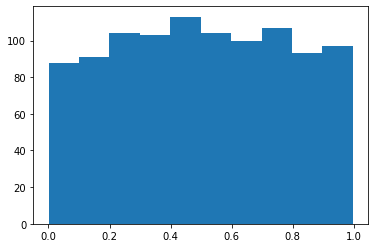

In [3]:
plt.hist(uni_y)
plt.show()

In [4]:
#defining U
np.random.seed(500)
uni_u=np.random.rand(1000)

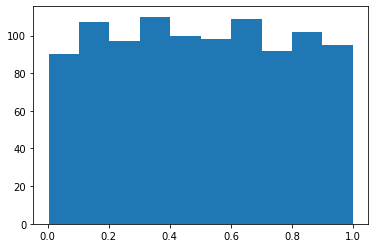

In [5]:
plt.hist(uni_u)
plt.show()

# Half-normal

In [6]:
half_dist=[]
for y in range(0,1000):
    if (-2*(np.log(uni_y[y])) == (np.log(uni_u[y]) + 1)**2) or (-2*(np.log(uni_y[y])) > (np.log(uni_u[y]) + 1)**2):
        half_dist.append(-np.log(uni_u[y]))

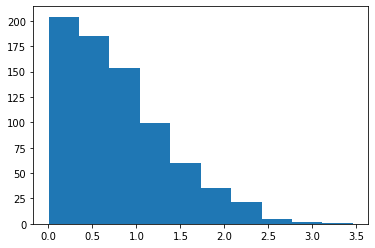

In [7]:
plt.hist(half_dist)
plt.show()

# Full Normal

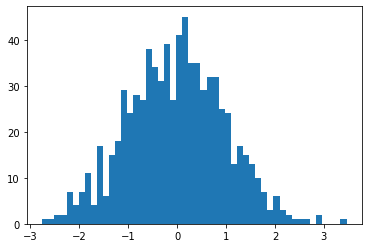

In [10]:
norm = list()
np.random.seed(1984)
uni=np.random.rand(1000)
for i in range(0, len(half_dist)):
    if uni[i] > 0.5:
        norm.append(half_dist[i])
    else:
        norm.append(-half_dist[i])
plt.hist(norm, bins=50)
plt.show()

# Normality and timing test

In [11]:
from scipy.stats import shapiro

In [12]:
shapiro(norm)

ShapiroResult(statistic=0.9985335469245911, pvalue=0.7846737504005432)

In [13]:
import timeit

In [14]:
mysetup = "import numpy as np"
mycode = '''
uni_y = np.random.rand(1000)
uni_u=np.random.rand(1000)
half_dist=list()
for y in range(0,1000):
    if (-2*(np.log(uni_y[y])) == (np.log(uni_u[y]) + 1)**2) or (-2*(np.log(uni_y[y])) > (np.log(uni_u[y]) + 1)**2):
        half_dist.append(-np.log(uni_u[y]))
norm = list()
np.random.seed(1984)
uni=np.random.rand(1000)
for i in range(0, len(half_dist)):
    if uni[i] > 0.5:
        norm.append(half_dist[i])
    else:
        norm.append(-half_dist[i])'''


In [15]:
print (timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1000))

14.288108200000002


In [16]:
default='''np.random.randn'''

In [17]:
print (timeit.timeit(setup = mysetup,
                     stmt = default,
                     number = 1000))

0.00026999999999688384


In [18]:
print (timeit.timeit(setup = mysetup,
                     stmt = mycode,
                     number = 1))

0.020893800000003182


In [19]:
print (timeit.timeit(setup = mysetup,
                     stmt = default,
                     number = 1))

4.000000000559112e-06
